In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import pandas as pd

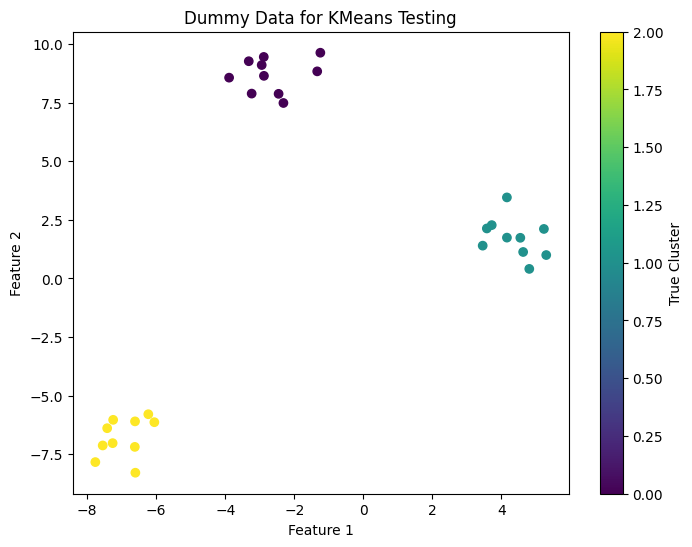

In [107]:
def generate_dummy_data(n_samples=30, n_centers=3, random_state=42):
    X, y = make_blobs(n_samples=n_samples, 
                     centers=n_centers, 
                     cluster_std=0.8,
                     random_state=random_state)
    return X, y


X, y = generate_dummy_data()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Dummy Data for KMeans Testing')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')
plt.show()


In [108]:
print("Data Shape", X.shape)
print("Labels Shape", y.shape)

Data Shape (30, 2)
Labels Shape (30,)


In [112]:
class KMeansPractice:
    def __init__(self,epochs=100,k=3):
        self.epochs = epochs
        self.centroids = None
        self.pi_ik = [0]*30
        self.k = k

    def initializeCentroids(self,X):
        lenOfDataset = X.shape[0]
        indices = [random.randint(0,lenOfDataset) for _ in range(self.k)]
        self.centroids = X[indices]

    def assignPointsToClusters(self,X):
        lenOfDataset = X.shape[0]

        for i in range(lenOfDataset):
            minDistance = 1e9
            minCluster = -1
            for j in range(self.k):
                distance = np.sum((X[i] - self.centroids[j])**2)
                if distance < minDistance:
                    minDistance = distance
                    minCluster = j
            self.pi_ik[i] = minCluster
                
    def updateClusterCentroids(self,X):
        for i in range(self.k):
            idxPointsOfI = [j for j in range(len(self.pi_ik)) if self.pi_ik[j] == i]
            pointsOfI = X[idxPointsOfI]
            self.centroids[i] = np.mean(pointsOfI,axis=0)

    def fit(self,X):
        self.initializeCentroids(X)
        for _ in range(self.epochs):
            self.assignPointsToClusters(X)
            self.updateClusterCentroids(X)

        return self.pi_ik

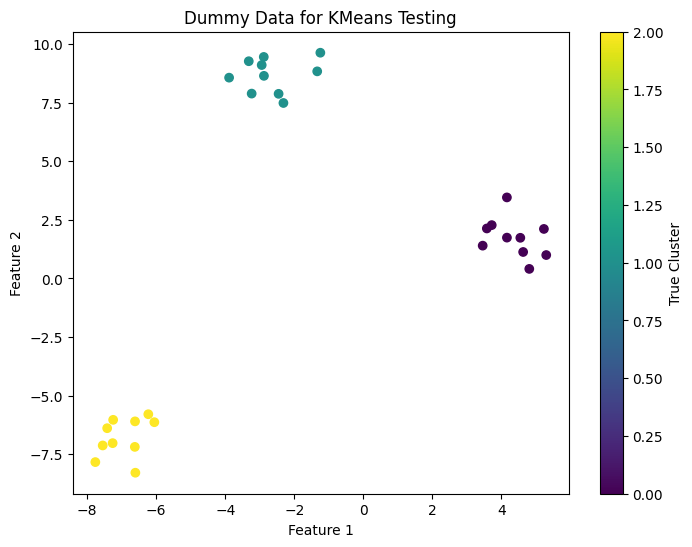

In [120]:
kmeans = KMeansPractice(100,3)
cluster_assignments = kmeans.fit(X)

df  = pd.DataFrame(X,columns = ['PointX', 'PointY'])
df['LabelOriginal'] = y
df['LabelPredicted'] = cluster_assignments

plt.figure(figsize=(8, 6))
plt.scatter(df['PointX'],df['PointY'], c=df['LabelPredicted'], cmap='viridis')
plt.title('Dummy Data for KMeans Testing')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')
plt.show()